In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters


# Instruction

Change directory name to get stats on the overall ES or different categories

- data/coded_sub_section.csv
- data/cat1/coded_sub_section.csv
- data/cat2/coded_sub_section.csv
- data/cat3/coded_sub_section.csv
- data/cat4/coded_sub_section.csv

In [129]:
df = pd.read_csv('data/coded_sub_section.csv',header=0)


In [130]:
df.shape

(1032, 6)

In [131]:
df.Cond_Category.value_counts()

3    401
4    262
1    197
2    172
Name: Cond_Category, dtype: int64

In [132]:
df.median()

Determination_Year    2016.0000
Cond_Category            3.0000
EScore                   0.4275
dtype: float64

In [133]:
df.mode()

,Textfile,Determination_Year,Sub_Header,Sub_Section,Cond_Category,EScore
0,/home/admin/dockers/masters/data/pdfminer/sear...,2015.0,Water Management Plan,The compensatory water supply measures must pr...,3,0.4275


In [134]:
df.describe()

,Determination_Year,Cond_Category,EScore
count,959.000000,1032.000000,1032.000000
mean,2016.163712,2.705426,0.496195
std,2.575235,1.048045,0.299894
min,2012.000000,1.000000,0.000000
25%,2014.000000,2.000000,0.264937
50%,2016.000000,3.000000,0.427500
75%,2018.000000,4.000000,0.700000
max,2021.000000,4.000000,1.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Textfile            1032 non-null   object 
 1   Determination_Year  959 non-null    float64
 2   Sub_Header          1032 non-null   object 
 3   Sub_Section         1032 non-null   object 
 4   Cond_Category       1032 non-null   int64  
 5   EScore              1032 non-null   float64
 6   Stars               1032 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 56.6+ KB


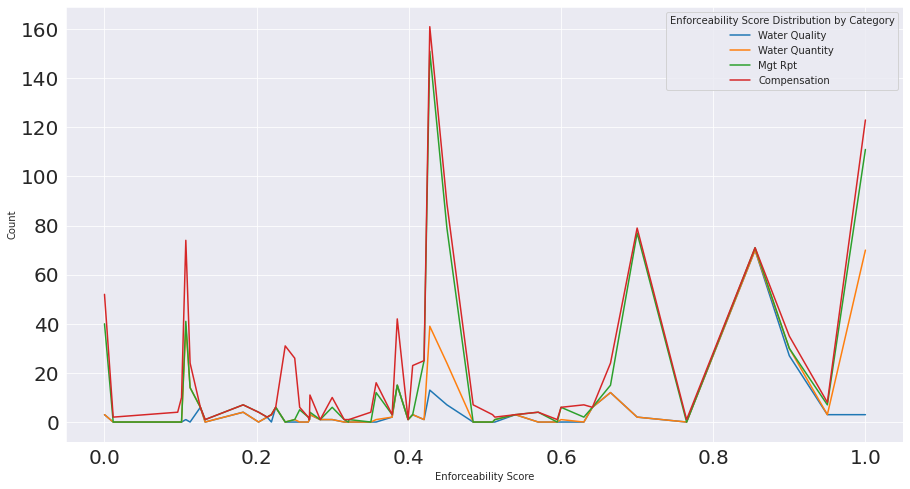

In [159]:
#df.groupby(['EScore','Cond_Category']).size().unstack().plot(kind='line',stacked=True,figsize=(15,8)).legend(["Water Quality","Water Quantity","Mgt Rpt","Compensation"],loc='upper right', title="Enforceability Score Distribution by Category", xlabel='Enforceability Score',ylabel='Count')
df.groupby(['EScore','Cond_Category']).size().unstack().plot(kind='line',stacked=True,figsize=(15,8), xlabel='Enforceability Score',ylabel='Count',fontsize=20).legend(["Water Quality","Water Quantity","Mgt Rpt","Compensation"],loc='upper right', title="Enforceability Score Distribution by Category")
sns.set_style("darkgrid")
plt.show()

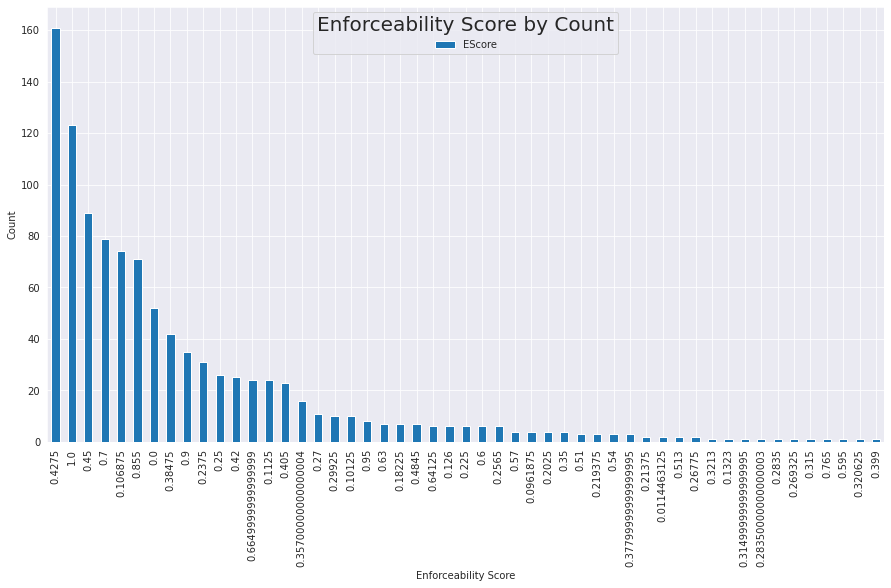

In [164]:
#df['EScore'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,8), xlabel='Enforceability Score',ylabel='Count').legend(["Water Quality","Water Quantity","Mgt Rpt","Compensation"],loc='upper right', title="Enforceability Score Distribution by Category")
df['EScore'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,8), xlabel='Enforceability Score',ylabel='Count').legend(loc='upper center', title="Enforceability Score by Count",title_fontsize=20)

AttributeError: 'Line2D' object has no property 'kind'

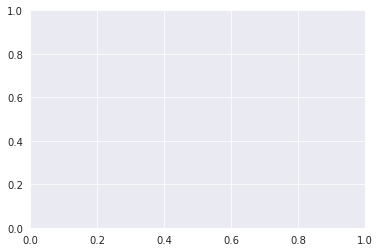

In [175]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.plot((df['EScore'].value_counts().sort_values(ascending=False)),kind='bar',figsize=(15,8)) #.plot(kind='bar',figsize=(15,8))
plt.title('Damped exponential decay', fontdict=font)

plt.xlabel('Enforceability Score', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
plt.show()


In [150]:
df['Stars'] = 0
for i in range(len(df)):
    if df.iloc[i,5] == 0:
        df.iloc[i,6] = 0
    elif df.iloc[i,5] < .2:
        df.iloc[i,6] = 1
    elif df.iloc[i,5] < .4:
        df.iloc[i,6] = 2
    elif df.iloc[i,5] < .6:
        df.iloc[i,6] = 3
    elif df.iloc[i,5] < .8:
        df.iloc[i,6] = 4
    elif df.iloc[i,5] > .8:
        df.iloc[i,6] = 5  
        
df.head()

,Textfile,Determination_Year,Sub_Header,Sub_Section,Cond_Category,EScore,Stars
0,/home/admin/dockers/masters/data/pdfminer/sear...,2012.0,Pollution of Waters,Except as may be expressly provided by a OEH ...,1,0.8550,5
1,/home/admin/dockers/masters/data/pdfminer/sear...,2012.0,Creek Diversions for the Underground Project,The Proponent shall carry out the proposed di...,1,0.4275,3
2,/home/admin/dockers/masters/data/pdfminer/sear...,2012.0,Creek Diversions for the Underground Project,Within 6 months of completing the construction...,1,0.6650,4
3,/home/admin/dockers/masters/data/pdfminer/sear...,2012.0,Discharge,Except as may be expressly provided for by an...,1,0.8550,5
4,/home/admin/dockers/masters/data/pdfminer/sear...,2012.0,Discharge,However water may be transferred between the s...,1,0.5400,3


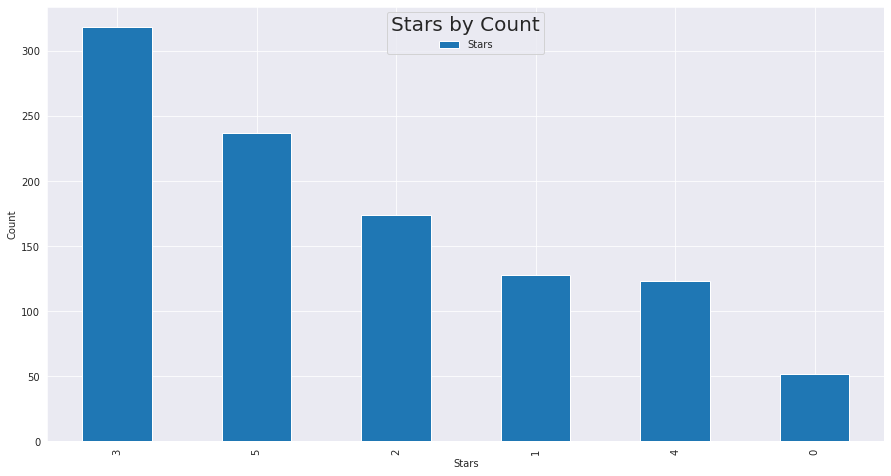

In [176]:
#df['EScore'].count_values().plot.bar(x='EScore', y=['Cond_Category'],figsize=(15,7), grid=True, title='Enforceability Skewness', xlabel='Enforceability',ylabel='Count')
#df['your_column'].count_values().plot.bar(rot=0)
df['Stars'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,8), xlabel='Stars',ylabel='Count').legend(loc='upper center', title="Stars by Count",title_fontsize=20)

In [ ]:
df1 = 
df2 =
df3 =

In [ ]:
fig, axs = plt.subplots(4, 1,figsize=(15,15))
        
        axs[0].scatter(a1, a2)
        #axs[0].set_xlim(0, 2)
        axs[0].set_xlabel('Conditions')
        axs[0].set_ylabel('Enforceability Score')
        axs[0].grid(True)
        
        axs[0].set_title('Scatter, Actual GW967137.1.1 v Actual GW967137.2.2')
        axs[1].set_title('Coherence, Actual GW967137.1.1 v Actual GW967137.2.2')
        
        cxy, f = axs[1].cohere(a1, a2, 128, 1. / dt)
        axs[1].set_ylabel('coherence')
        
        axs[2].scatter(a3, a4)
        #axs[0].set_xlim(0, 2)
        axs[2].set_xlabel('GW967138.1.1')
        axs[2].set_ylabel('GW967138.2.2')
        axs[2].grid(True)
        
        axs[2].set_title('Scatter, Actual in GW967138.1.1 v Actual GW967138.2.2')
        axs[3].set_title('Coherence, Actual GW967138.1.1 v Actual GW967138.2.2')
        
        cxy, f = axs[3].cohere(a3, a4, 128, 1. / dt)
        axs[3].set_ylabel('coherence')
        
       
                              
        fig.tight_layout()
        
        plt.show()
        plt.close()